In [1]:
# import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset
iris=pd.read_excel("/content/iris.xls")

In [3]:
#Understand structure of data
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Shape of data(no.of rows and no.of columns)
iris.shape

(150, 5)

In [ ]:
## Datatypes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
## Statistics
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Checking Null values
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In SL,SW and PL columns contains null values

In [4]:
## Filling SL missing values with mean
mean_sl=iris['SL'].mean()
iris1=iris['SL'].fillna(mean_sl)
iris['SL']=iris1


In [ ]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [5]:
## Filling SW missing values with mean
mean_sw=iris['SW'].mean()
iris_sam=iris['SW'].fillna(mean_sw)
iris['SW']=iris_sam

In [6]:
## Filling PL Null values with mean
iris['PL']=iris['PL'].fillna(iris['PL']).mean()


In [7]:
## Check any null values present
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
#number of rows belongs to each class
iris.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<ipython-input-10-6ab14df2225a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='magma')


<Axes: >

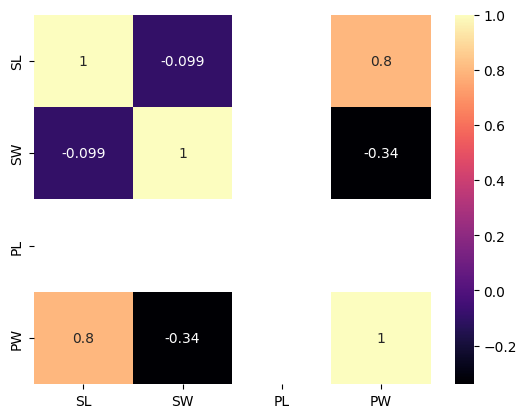

In [10]:
## correlation ==>graph heatmap(from seaborn )
##draws heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(iris.corr(),annot=True,cmap='magma')


From this matrics ,the SW and SL are not correlated. The PL and PW are highly correlated.

# Dividing data into features and labels

In [16]:
feature_columns = ['SL', 'SW', 'PL','PW']
X = iris[feature_columns].values
y = iris['Classification'].values

# Spliting dataset into training set and test set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=44)

In [19]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((105, 4), (45, 4))

# Fit the model

In [18]:
# Fitting clasifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Testing the KNN algorithm on the Testing Data

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.78 %.


kNN algorithm : Accuracy of our model is equal 97.78 %.

# Confusion metrics

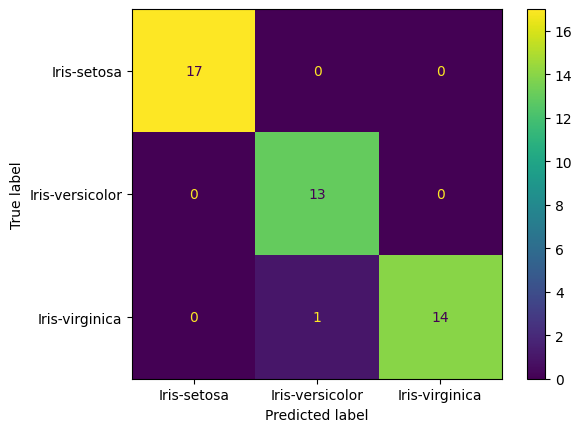

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

# Logistic Regression on testing data

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))


The accuracy of the Logistic Regression is 0.9111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the Logistic Regression : 0.9111111111111111


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

Build Decision Tree Model

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# max_depth : Depth of the tree. eg: Decision Tree contrained to 3 levels

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluate the model

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of decision tree algorithm:",metrics.accuracy_score(y_test, y_pred))

Accuracy of decision tree algorithm: 0.9555555555555556


Accuracy of decision tree algorithm: 0.9555555555555556

# Random Forest

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

In [ ]:
# Check accuracy score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9333


Model accuracy score with 10 decision-trees : 0.9333


# SVM(support vector machine) Algorithm

In [28]:
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

 check the acurracy of the model

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 95.36 %


# **conclusion**

kNN algorithm : Accuracy of our model is equal 97.78 % ie 0.9778

The accuracy of the Logistic Regression : 0.9111111111111111

Accuracy of decision tree algorithm: 0.955555555555555

Model accuracy score with 10 decision-trees(random forest) : 0.9333

Accuracy of SVM :95.36% ie,0.9536

kNN algorithm gives the best result